In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-bright','dark_background'])

In [3]:
data=pd.read_csv('Datasets\churn_prediction_simple.csv')

In [4]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [4]:
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [5]:
#checking the dataset distribution
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

we have imbalanced data

In [6]:
#seperating
X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [7]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x=sc.fit_transform(X)

In [8]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,Y,train_size=0.8,stratify=Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Model building

In [9]:
from sklearn.linear_model import LogisticRegression as LR
ls=LR(class_weight='balanced') #as we have imbalanced data
ls.fit(x_train,y_train)
predicted_values=ls.predict(x_test) #predicting clasess
predicted_probabilites=ls.predict_proba(x_test) #predicting probabilities


In [10]:
predicted_values

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [11]:
predicted_probabilites,predicted_probabilites.shape # for both classes,class0 and class 1

(array([[0.58698337, 0.41301663],
        [0.62574298, 0.37425702],
        [0.59384283, 0.40615717],
        ...,
        [0.54885421, 0.45114579],
        [0.14260413, 0.85739587],
        [0.3246247 , 0.6753753 ]]),
 (4414, 2))

# Evaluation metrics

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicted_values)

array([[2682,  877],
       [ 305,  550]], dtype=int64)

In [13]:
ls.score(x_test,y_test)

0.7322156773901224

In [14]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predicted_values)
accuracy

0.7322156773901224

In [15]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [16]:
precision=precision_score(y_test,predicted_values)
precision

0.3854239663629993

In [17]:
recall=recall_score(y_test,predicted_values)
recall

0.6432748538011696

In [18]:
f1=f1_score(y_test,predicted_values)
f1

0.48203330411919365

#f1 score is < 0.50,lets check feature engineering might help

In [19]:
# calculating precision, recall, f1-score and support at once.
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values) #returns the matrices for 2 classes

In [20]:
precision

array([0.89789086, 0.38542397])

In [21]:
recall

array([0.75358247, 0.64327485])

In [22]:
f1

array([0.81943171, 0.4820333 ])

In [23]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      3559
           1       0.39      0.64      0.48       855

    accuracy                           0.73      4414
   macro avg       0.64      0.70      0.65      4414
weighted avg       0.80      0.73      0.75      4414



# precision recall curve

In [24]:
# gathering Precision/recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilites[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4410,), (4410,), (4409,))

as we have 1 point less in threshold_points we drop last point from every for plotting curve

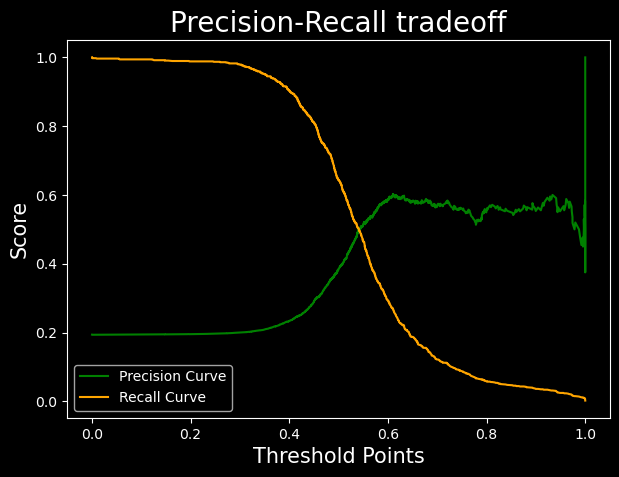

In [25]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( threshold_points, precision_points[:-1], color = 'green', label = 'Precision Curve')
plt.plot( threshold_points, recall_points[:-1], color = 'orange', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

it shows the tradeoff btw precision and recall,as precision inc recall dec,
and the intersection point is some around 0.55 threshold,which should be the great threshold for the max performance of classification model

# AUC-ROC Curve

In [26]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilites[:,1]) #we are passing the probabilities of class 1

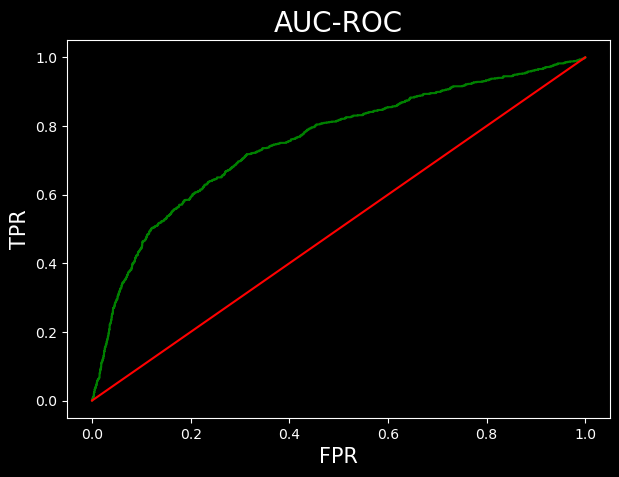

0.7522751807870336

In [27]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilites[:,1])

# Coefficient Plot

In [28]:
# arranging the data
c = ls.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame( {
                            'coefficients': c,
                            'variable' : x
                            })

# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
9,-2.103848,current_balance
13,-0.370116,current_month_credit
10,-0.346647,previous_month_end_balance
0,-0.170972,vintage
14,-0.124657,previous_month_credit


Text(0.5, 1.0, 'Coefficient plot')

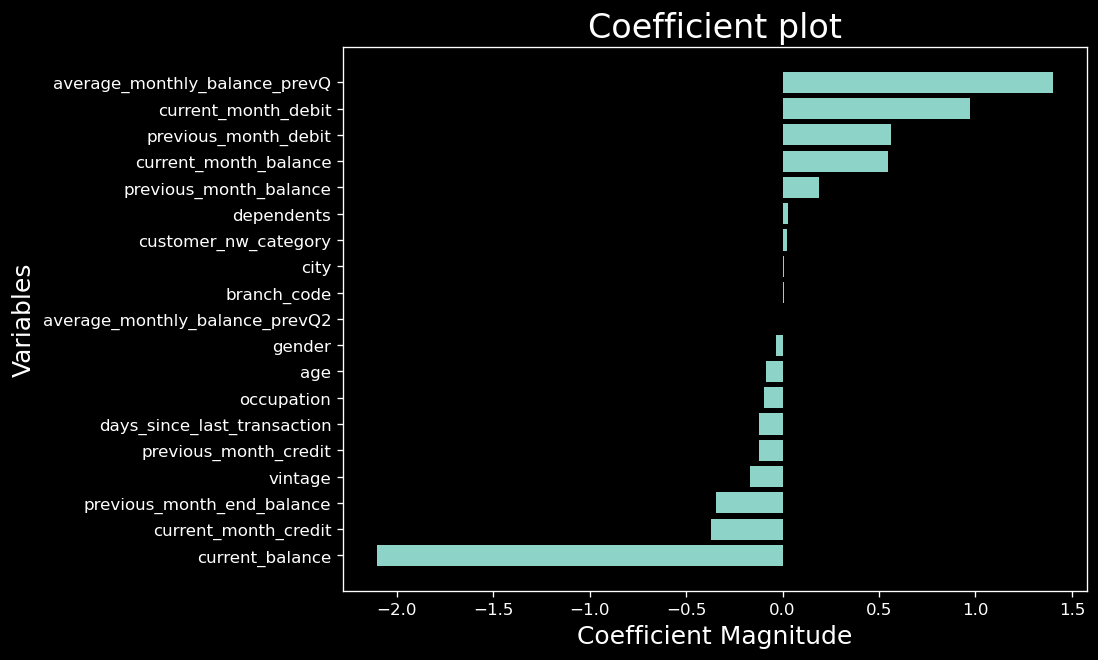

In [29]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)

# Decision Tree(Classification)

In [2]:
data=pd.read_csv('Datasets\churn_prediction_simple.csv')

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


same as above for logistic till sclaing ,excluding scaling in decision tree because it is not dist dependent

In [32]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,stratify=Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Model building

In [33]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier=DTC(class_weight='balanced')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [34]:
predicted_values=classifier.predict(x_train)

In [35]:
predicted_values[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
#Evalution metrics
#on train data
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [37]:
#on test data
predicted_values=classifier.predict(x_test)
predicted_values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [38]:
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3559
           1       0.44      0.42      0.43       855

    accuracy                           0.78      4414
   macro avg       0.65      0.65      0.65      4414
weighted avg       0.78      0.78      0.78      4414



from here we can say that the model performed well on training data but not well on testing data,
so its undergoing overfitting

# Visualizing decision tree

In [39]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree=classifier,out_file='tree_decision',max_depth=None,
               feature_names=X.columns,label=None,impurity=False)

In [ ]:
from graphviz import render
render(filepath='tree_decision',format='png',engine='neato')

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10),dpi=100)
plot_tree(classifier)
plt.show()

# Hyperparameter Tunning

In [42]:
classifier=DTC()
classifier.fit(x_train,y_train)


DecisionTreeClassifier()

In [43]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# max_depth

In [44]:
from sklearn.metrics import f1_score
def cal_score(model,x1,y1,x2,y2): #x1,y1=train data x2,y2=test data
    model.fit(x1,y1)
    predict=model.predict(x1)
    f1=f1_score(y1,predict)
    predict=model.predict(x2)
    f2=f1_score(y2,predict)
    return f1,f2

In [45]:
def effect(train_score,test_score,x_axis,title):
    
#train_score=the list of scores when predictions are made on the training set
#test_score=the list of scores when predictions are made on the testing set
#x_axis=the list of parameter values wich were used to generate the respective f1 scores which are on y axis
#title=title on the plot
                        
    plt.figure(figsize=(10,7),dpi=100)
    plt.plot(x_axis,train_score,color='red',label='train_score')
    plt.plot(x_axis,test_score,color='blue',label='test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel('parameter value')
    plt.ylabel('f1 score')
    plt.show()

In [46]:
max_depth=[i for i in range(1,50)] #to limit the depth of the decision tree classifier
train=[]
test=[]
for i in max_depth:
    model=DTC(class_weight='balanced',max_depth=i,random_state=42)
    f1,f2=cal_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

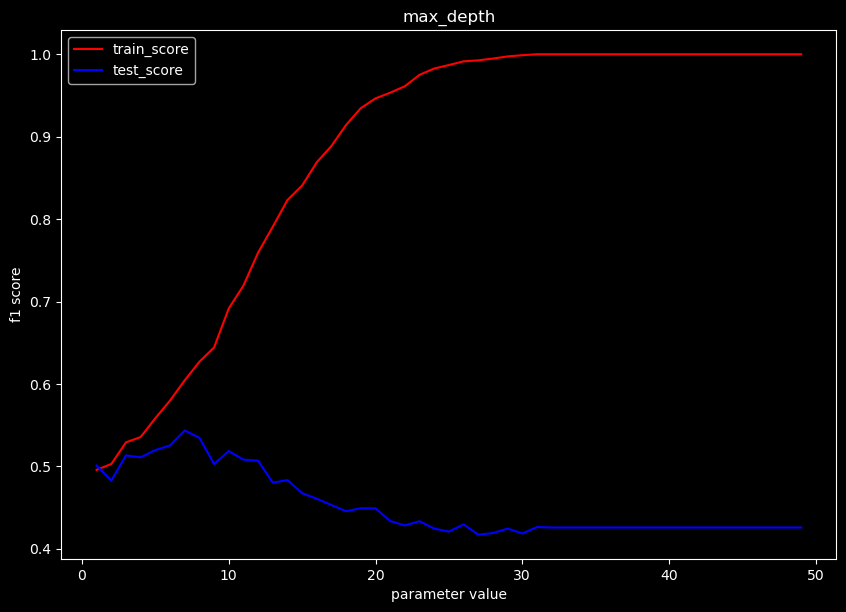

In [47]:
effect(train,test,range(1,50),'max_depth')

# min_samples_split

In [48]:
min_samples=[i for i in range(2,2500,25)] #to limit the depth of the decision tree classifier
train=[]
test=[]
for i in min_samples:
    model=DTC(class_weight='balanced',min_samples_split=i,random_state=42)
    f1,f2=cal_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

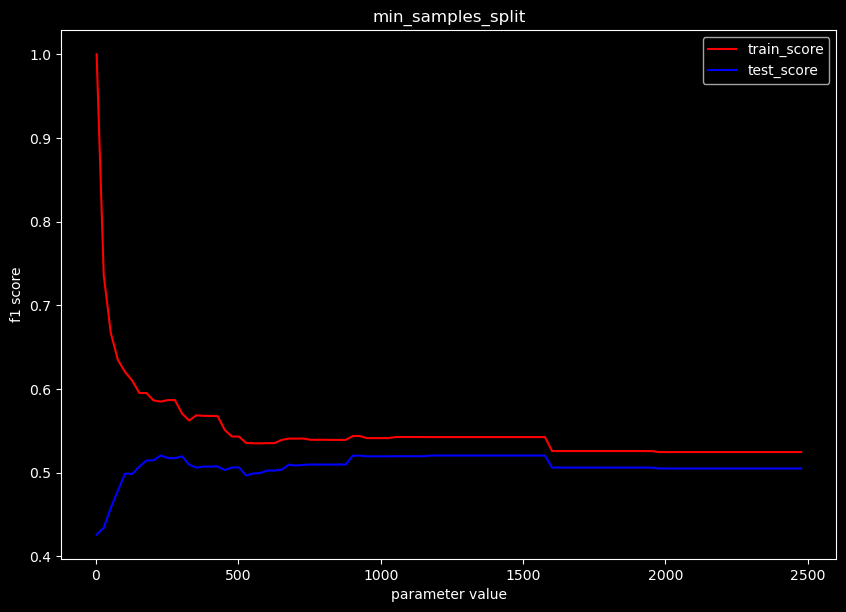

In [49]:
effect(train,test,range(2,2500,25),'min_samples_split')

the range we have at 950to 1000 have optimal value of parameters to split,beyond that its undergoing underfiting

# max_leaf nodes

In [50]:
max_leafnodes=[i for i in range(2,200,10)] #to limit the depth of the decision tree classifier
train=[]
test=[]
for i in max_leafnodes:
    model=DTC(class_weight='balanced',max_leaf_nodes=i,random_state=42)
    f1,f2=cal_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

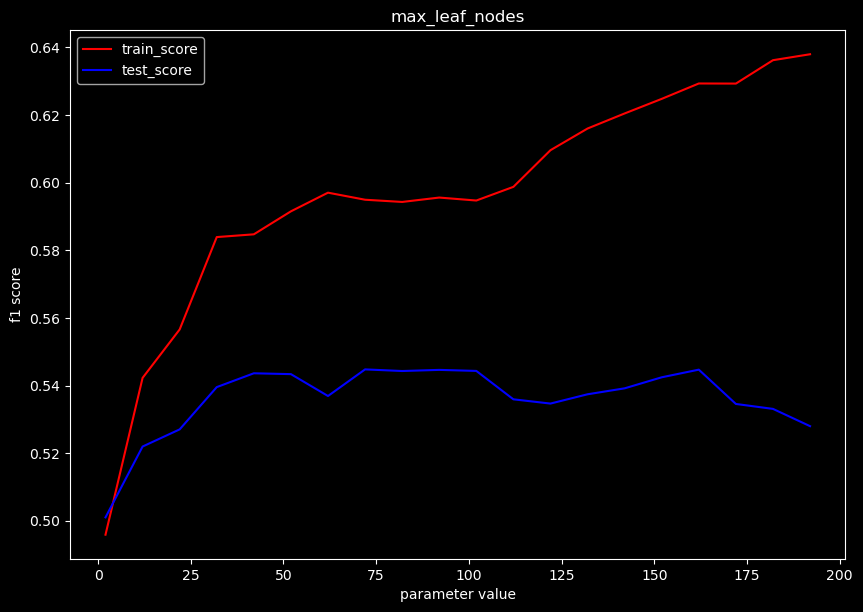

In [51]:
effect(train,test,range(2,200,10),'max_leaf_nodes')

for parameter is too small its underfitting nad beyond 25 it is overfiiting

In [52]:
minsamplesleaf=[i for i in range(2,4000,25)] #to limit the depth of the decision tree classifier
train=[]
test=[]
for i in minsamplesleaf:
    model=DTC(class_weight='balanced',min_samples_leaf=i,random_state=42)
    f1,f2=cal_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

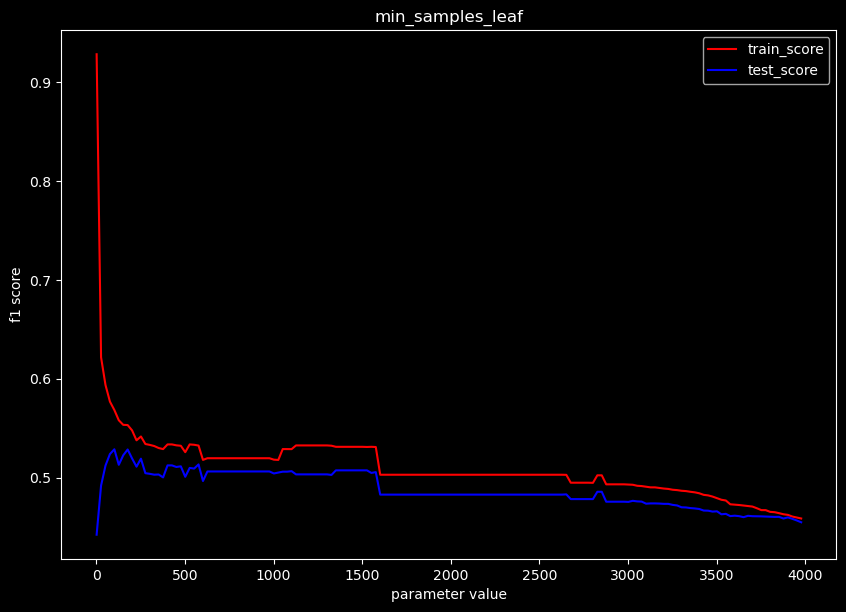

In [53]:
effect(train,test,range(2,4000,25),'min_samples_leaf')

for low parameter value it under goes overfitting,for large value it undergoes underfitting

# Feature importance

In [54]:
model=DTC(max_depth=9)
model.fit(x_train,y_train)
feature_imp=pd.Series(model.feature_importances_,index=X.columns)
k=feature_imp.sort_values()

In [55]:
k

occupation                        0.002195
gender                            0.002476
dependents                        0.003311
customer_nw_category              0.003436
city                              0.008889
age                               0.010637
days_since_last_transaction       0.012983
branch_code                       0.020710
previous_month_end_balance        0.021597
current_month_credit              0.024759
previous_month_credit             0.025833
previous_month_debit              0.035973
vintage                           0.036271
average_monthly_balance_prevQ2    0.039071
current_month_balance             0.043570
previous_month_balance            0.049958
current_month_debit               0.083656
average_monthly_balance_prevQ     0.088610
current_balance                   0.486063
dtype: float64

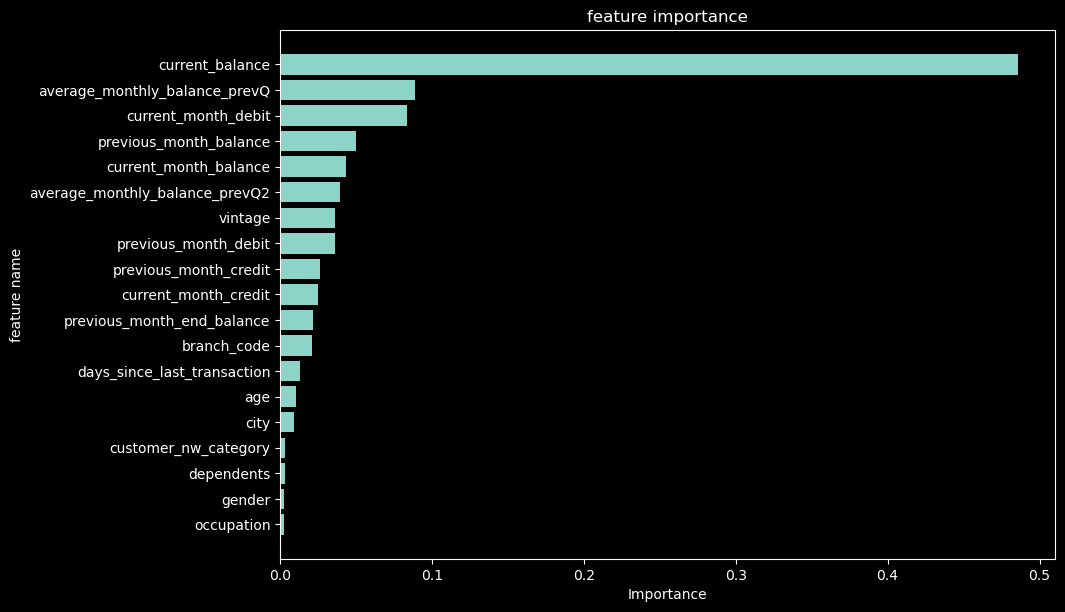

In [56]:
plt.figure(figsize=(10,7),dpi=100)
plt.barh(k.index,k)
plt.xlabel('Importance')
plt.ylabel('feature name')
plt.title('feature importance')
plt.show()

# ENSEMBLE LEARNING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [5]:
#seperating
X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [6]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x=sc.fit_transform(X)

In [7]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,Y,train_size=0.8,stratify=Y,random_state=101)
#stratify=Y,(both train and test contain the target variable in equal distribution)
#random state=data will split in the same way,which ensures reprodusable results
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [9]:
pip install scikit-Learn

^C
Note: you may need to restart the kernel to use updated packages.


# Model building,Bagging Logistic Regression

In [8]:
from sklearn.ensemble import BaggingClassifier as BC
classifier=BC()
classifier.fit(x_train,y_train)

BaggingClassifier()

In [9]:
classifier.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
from sklearn.linear_model import LogisticRegression as LR
classifier= BC(base_estimator=LR(),n_estimators=150,n_jobs=-1,random_state=42)
#150 logistic reg models will be combined to generate predictions
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     14234
           1       0.75      0.08      0.15      3419

    accuracy                           0.82     17653
   macro avg       0.78      0.54      0.52     17653
weighted avg       0.80      0.82      0.75     17653



In [12]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3559
           1       0.78      0.09      0.16       855

    accuracy                           0.82      4414
   macro avg       0.80      0.54      0.53      4414
weighted avg       0.81      0.82      0.76      4414



we are getting as f1 to be so less even though we used 150 models,due to we are doing data without feature transformation and feature engineering,
so each model is underfitting the data

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier=RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
classifier.get_params() #these are parameters of both bagging technique and decision tree classifier are present
#there is no feature sampling parameter here because it is compulasry for random forest

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
predicted_values=classifier.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [16]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3559
           1       0.71      0.44      0.54       855

    accuracy                           0.86      4414
   macro avg       0.79      0.70      0.73      4414
weighted avg       0.84      0.86      0.84      4414



we have error at the test data,model is overfitting the data but it quite better than the individual decision tree

# Hyperparameter tunning

In [17]:
#n_estimators
from sklearn.metrics import f1_score
def cal_score(model,x1,y1,x2,y2): #x1,y1=train data x2,y2=test data
    model.fit(x1,y1)
    predict=model.predict(x1)
    f1=f1_score(y1,predict)
    predict=model.predict(x2)
    f2=f1_score(y2,predict)
    return f1,f2

In [18]:
def effect(train_score,test_score,x_axis,title):
    
#train_score=the list of scores when predictions are made on the training set
#test_score=the list of scores when predictions are made on the testing set
#x_axis=the list of parameter values wich were used to generate the respective f1 scores which are on y axis
#title=title on the plot
                        
    plt.figure(figsize=(10,7),dpi=100)
    plt.plot(x_axis,train_score,color='red',label='train_score')
    plt.plot(x_axis,test_score,color='blue',label='test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel('parameter value')
    plt.ylabel('f1 score')
    plt.show()

In [19]:
classifier=RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
classifier.get_params()
#max_features=the no of random features to be considered at every split it is set to auto i.e is sqrt of total no of features
#max_samples=the no of bootstraped samples that every decision tree recevies from the original dataset
#

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we will be looking the parameters related to bagging technique

In [22]:
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:  
    model = RFC(class_weight = 'balanced_subsample', #the weights are assigned based on the bootstrapped sample that each tree recevied
              n_estimators = i,
              n_jobs = -1,
              max_depth = 7,
              random_state = 101)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

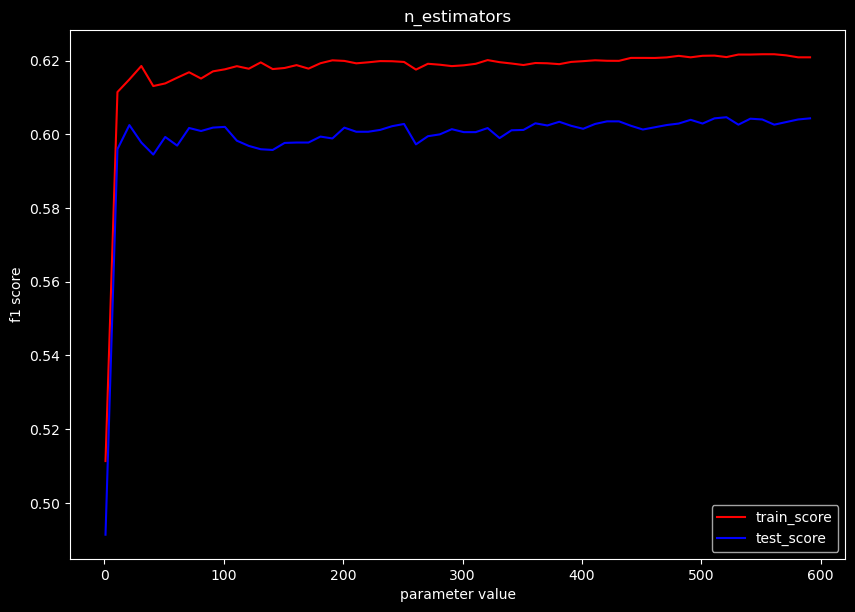

In [23]:
effect( train, test, range(1,600,10) , 'n_estimators')

choosing the large no of parameters in random forest is not the best idea

# max_samples

In [25]:
maxsamples = [i/1000 for i in range(1,1000)]
train = []
test = []

for i in maxsamples:  
    model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,
              n_jobs = -1, max_depth = 7, random_state = 101, max_samples = i)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

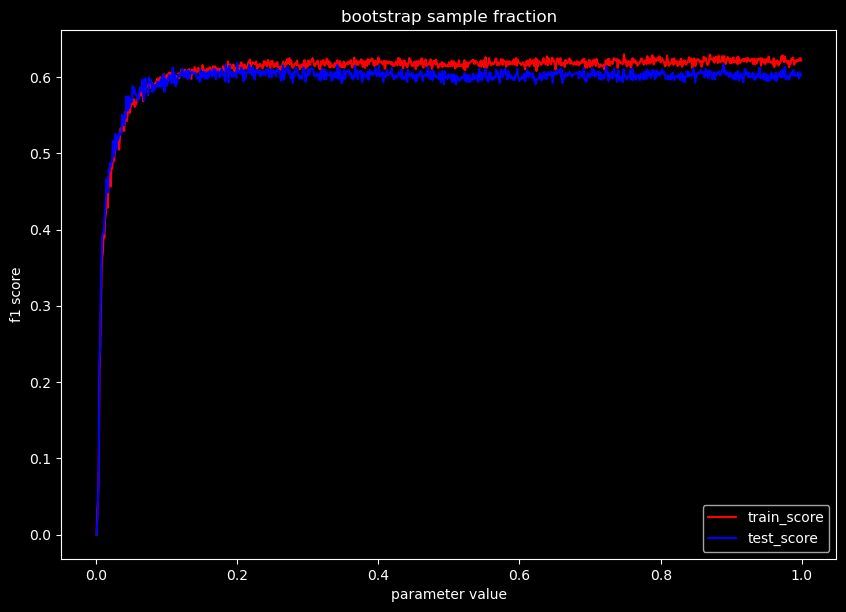

In [26]:
effect( train, test, maxsamples , 'bootstrap sample fraction')

In [27]:
#the no of max features provided to each decision tree
maxfeatures = range(1,X.shape[1])
train = []
test = []

for i in maxfeatures:  
    model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,
              n_jobs = -1, max_depth = 7, random_state = 101, max_features = i)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

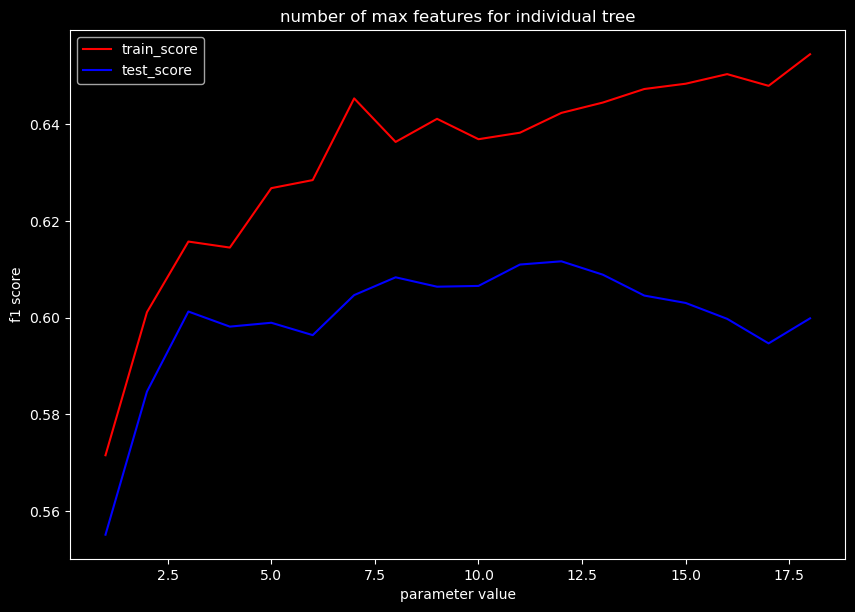

In [28]:
effect( train, test, maxfeatures , 'number of max features for individual tree')

max value will be at pprox 6.0 after model tries to overfit
default parameter value=sqrt(no of total features in the dataset)